## Dataset Information

BigMart's data scientists have collected sales data from 2013 for 1559 products across 10 stores in various cities. They have also defined certain attributes for each product and store. The objective is to build a predictive model to determine the sales of each product at a specific store.

By using this model, BigMart aims to identify the key properties of products and stores that significantly influence sales.

| Variable                  | Description                                                                                   |
|---------------------------|-----------------------------------------------------------------------------------------------|
| **Item_Identifier**       | Unique product ID                                                                             |
| **Item_Weight**           | Weight of the product                                                                         |
| **Item_Fat_Content**      | Indicates if the product is low fat or not                                                    |
| **Item_Visibility**       | The percentage of the total display area in a store allocated to the particular product        |
| **Item_Type**             | The category to which the product belongs                                                     |
| **Item_MRP**              | Maximum Retail Price (list price) of the product                                              |
| **Outlet_Identifier**     | Unique store ID                                                                               |
| **Outlet_Establishment_Year** | The year the store was established                                                       |
| **Outlet_Size**           | The size of the store in terms of ground area covered                                         |
| **Outlet_Location_Type**  | The type of city in which the store is located                                                |
| **Outlet_Type**           | Whether the outlet is a grocery store or a type of supermarket                                |
| **Item_Outlet_Sales**     | Sales of the product in the particular store. This is the outcome variable to be predicted    |



## Import modules

In [48]:
# Import the pandas library, often used for data manipulation and analysis
import pandas as pd

# Import the numpy library, used for numerical operations
import numpy as np

# Import the seaborn library, a data visualization library based on matplotlib
import seaborn as sns

# Import the pyplot module from the matplotlib library for plotting
import matplotlib.pyplot as plt

# Import the warnings module to manage warnings in the code
import warnings

# Ensure that matplotlib plots are displayed inline in Jupyter Notebooks
%matplotlib inline

# Ignore all warnings that might occur during code execution
warnings.filterwarnings('ignore')

# Import the LabelEncoder class from the sklearn.preprocessing module
from sklearn.preprocessing import LabelEncoder





## Loading the dataset

In [49]:
# Read the CSV file into a DataFrame
# 'Big-Mart-Sales-Prediction/Train.csv' is the file path to the CSV file
df = pd.read_csv('Big-Mart-Sales-Prediction/Train.csv')

# Display the first five rows of the DataFrame to get an overview of the data
# This helps in understanding the structure and content of the dataset
df.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [50]:
# statistical info
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [51]:
# datatyoe of attributes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [52]:
# Check the unique values in each column of the dataset
# The apply function applies a given function to each column of the DataFrame
# lambda x: len(x.unique()) is an anonymous function that calculates the number of unique values in each column
# x represents each column in the DataFrame
df.apply(lambda x: len(x.unique()))


Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

## Preprocessing the dataset

In [53]:
# Check for null values in the DataFrame
# df.isnull() returns a DataFrame of the same shape as df, where each element is a boolean value indicating whether that element is null (True) or not (False)
# .sum() is then called on this boolean DataFrame to get the count of null values in each column
df.isnull().sum()


Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [54]:
# Check for categorical attributes
cat_col = []  # Initialize an empty list to store the names of categorical columns

# Iterate over the column names and their data types
for x in df.dtypes.index:
    # Check if the data type of the column is 'object'
    if df.dtypes[x] == 'object':
        # Append the column name to the list if it is categorical
        cat_col.append(x)

# Display the list of categorical columns
cat_col


['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [55]:
# Remove specific columns from the list of categorical columns
cat_col.remove('Item_Identifier')  # Remove the 'Item_Identifier' column from the list
cat_col.remove('Outlet_Identifier')  # Remove the 'Outlet_Identifier' column from the list

# Display the updated list of categorical columns
cat_col


['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [56]:
# Print the categorical columns and their value counts
for col in cat_col:  # Iterate over each column in the list of categorical columns
    print(col)  # Print the name of the categorical column
    print(df[col].value_counts())  # Print the value counts for the current categorical column
    print()  # Print a blank line for better readability between columns


Item_Fat_Content
Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

Item_Type
Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

Outlet_Size
Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

Outlet_Location_Type
Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: count, dtype: int64

Outlet_Type
Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2   

In [57]:
# Fill the missing values

# Create a pivot table to calculate the mean Item_Weight for each Item_Identifier
# values = "Item_Weight" specifies that we want to calculate the mean for the 'Item_Weight' column
# index = 'Item_Identifier' specifies that we want to group by the 'Item_Identifier' column
item_weight_mean = df.pivot_table(values = "Item_Weight", index = 'Item_Identifier')

# Display the resulting pivot table which contains the mean Item_Weight for each Item_Identifier
item_weight_mean


,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


In [58]:
# Create a boolean Series to identify missing values in the 'Item_Weight' column
# df['Item_Weight'].isnull() returns a Series of the same length as df['Item_Weight']
# Each element in the Series is a boolean value indicating whether the corresponding element in df['Item_Weight'] is null (True) or not (False)
miss_bool = df['Item_Weight'].isnull()

# Display the boolean Series
miss_bool


0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Name: Item_Weight, Length: 8523, dtype: bool

In [59]:
# Iterate over each item in the 'Item_Identifier' column by index and value
for i, item in enumerate(df['Item_Identifier']):
    # Check if the 'Item_Weight' is missing (True in the miss_bool Series) for the current row
    if miss_bool[i]:
        # If the 'Item_Identifier' is in the item_weight_mean pivot table
        if item in item_weight_mean.index:
            # Fill the missing 'Item_Weight' with the mean weight from the pivot table for the specific 'Item_Identifier'
            df['Item_Weight'][i] = item_weight_mean.loc[item]['Item_Weight']
        else:
            # If 'Item_Identifier' is not in the pivot table, fill the missing 'Item_Weight' with the overall mean weight
            df['Item_Weight'][i] = np.mean(df['Item_Weight'])


In [60]:
# Check the number of missing values in the 'Item_Weight' column
# df['Item_Weight'].isnull() returns a Series of boolean values indicating whether each value in 'Item_Weight' is null (True) or not (False)
# .sum() is called on this Series to count the number of True values, which represent the missing values
df['Item_Weight'].isnull().sum()


0

In [61]:
# Create a pivot table to determine the most common (mode) Outlet_Size for each Outlet_Type
# values='Outlet_Size' specifies that we want to analyze the 'Outlet_Size' column
# columns='Outlet_Type' specifies that we want to create a separate column for each 'Outlet_Type'
# aggfunc=lambda x: x.mode()[0] specifies that we want to use the mode (most common value) as the aggregation function
# The lambda function (lambda x: x.mode()[0]) calculates the mode of the 'Outlet_Size' values for each 'Outlet_Type'
outlet_size_mode = df.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))

# Display the resulting pivot table which shows the most common Outlet_Size for each Outlet_Type
outlet_size_mode


Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [62]:
# Create a boolean Series to identify missing values in the 'Outlet_Size' column
# df['Outlet_Size'].isnull() returns a Series of the same length as df['Outlet_Size']
# Each element in the Series is a boolean value indicating whether the corresponding element in df['Outlet_Size'] is null (True) or not (False)
miss_bool = df['Outlet_Size'].isnull()

# Fill missing 'Outlet_Size' values using the most common 'Outlet_Size' for each 'Outlet_Type'
# df.loc[miss_bool, 'Outlet_Size'] selects the rows where 'Outlet_Size' is missing
# df.loc[miss_bool, 'Outlet_Type'].apply(lambda x: outlet_size_mode[x]) applies a lambda function to each 'Outlet_Type' in the selected rows
# lambda x: outlet_size_mode[x] retrieves the most common 'Outlet_Size' for the given 'Outlet_Type' from the pivot table 'outlet_size_mode'
df.loc[miss_bool, 'Outlet_Size'] = df.loc[miss_bool, 'Outlet_Type'].apply(lambda x: outlet_size_mode[x])


In [63]:
# Check the number of missing values in the 'Outlet_Size' column
# df['Outlet_Size'].isnull() returns a Series of boolean values indicating whether each value in 'Outlet_Size' is null (True) or not (False)
# .sum() is then called on this Series to count the number of True values, which represent the missing values
df['Outlet_Size'].isnull().sum()


0

In [64]:
sum(df['Item_Visibility'] == 0)

526

In [65]:
# Calculate the total number of entries in the 'Item_Visibility' column that are equal to 0
# df['Item_Visibility'] == 0 creates a boolean Series where each element is True if the corresponding 'Item_Visibility' value is 0, and False otherwise
# sum() is then called on this boolean Series to count the number of True values, which represent the entries where 'Item_Visibility' is 0
sum(df['Item_Visibility'] == 0)


526

In [66]:
# Replace zeros with mean in the 'Item_Visibility' column
# df.loc[:, 'Item_Visibility'] selects all rows (:) in the 'Item_Visibility' column
# .replace([0], [df['Item_Visibility'].mean()]) replaces all occurrences of 0 with the mean of the 'Item_Visibility' column
# inplace=True ensures that the changes are made directly in the original DataFrame, rather than creating a new DataFrame
df.loc[:, 'Item_Visibility'].replace([0], [df['Item_Visibility'].mean()], inplace=True)


In [67]:
# Calculate the total number of entries in the 'Item_Visibility' column that are equal to 0
# df['Item_Visibility'] == 0 creates a boolean Series where each element is True if the corresponding 'Item_Visibility' value is 0, and False otherwise
# sum() is then called on this boolean Series to count the number of True values, which represent the entries where 'Item_Visibility' is 0
sum(df['Item_Visibility'] == 0)


0

In [68]:
# Combine item fat content by standardizing different variations of the same category

# Replace values in the 'Item_Fat_Content' column
# The replace() method is used to replace specific values in the column
# {'LF':'Low Fat', 'reg':'Regular', 'low fat':'Low Fat'} is a dictionary that specifies the replacements:
# - 'LF' will be replaced with 'Low Fat'
# - 'reg' will be replaced with 'Regular'
# - 'low fat' will be replaced with 'Low Fat'
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF':'Low Fat', 'reg':'Regular', 'low fat':'Low Fat'})

# Display the counts of unique values in the 'Item_Fat_Content' column after replacement
# value_counts() returns a Series containing counts of unique values
df['Item_Fat_Content'].value_counts()


Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

## Creation of New Attributes

In [69]:
# Create a new column 'New_Item_Type' by extracting the first two characters of the 'Item_Identifier' column
# df['Item_Identifier'].apply(lambda x: x[:2]) applies a lambda function to each value in the 'Item_Identifier' column
# lambda x: x[:2] extracts the first two characters of each 'Item_Identifier'
df['New_Item_Type'] = df['Item_Identifier'].apply(lambda x: x[:2])

# Display the 'New_Item_Type' column to check the new values
df['New_Item_Type']


0       FD
1       DR
2       FD
3       FD
4       NC
        ..
8518    FD
8519    FD
8520    NC
8521    FD
8522    DR
Name: New_Item_Type, Length: 8523, dtype: object

In [70]:
# Map the 'New_Item_Type' column to more descriptive categories
# df['New_Item_Type'].map({'FD':'Food', 'NC':'Non-Consumable', 'DR':'Drinks'}) replaces the values in 'New_Item_Type' based on the provided mapping
# 'FD' is replaced with 'Food'
# 'NC' is replaced with 'Non-Consumable'
# 'DR' is replaced with 'Drinks'
df['New_Item_Type'] = df['New_Item_Type'].map({'FD':'Food', 'NC':'Non-Consumable', 'DR':'Drinks'})

# Display the counts of unique values in the 'New_Item_Type' column after the mapping
# value_counts() returns a Series containing counts of unique values
df['New_Item_Type'].value_counts()


New_Item_Type
Food              6125
Non-Consumable    1599
Drinks             799
Name: count, dtype: int64

In [71]:
# Update the 'Item_Fat_Content' column for rows where 'New_Item_Type' is 'Non-Consumable'
# df.loc[df['New_Item_Type']=='Non-Consumable', 'Item_Fat_Content'] selects the rows where 'New_Item_Type' is 'Non-Consumable' and targets the 'Item_Fat_Content' column
# = 'Non-Edible' assigns the value 'Non-Edible' to the 'Item_Fat_Content' column for the selected rows
df.loc[df['New_Item_Type']=='Non-Consumable', 'Item_Fat_Content'] = 'Non-Edible'

# Display the counts of unique values in the 'Item_Fat_Content' column after the update
# value_counts() returns a Series containing counts of unique values
df['Item_Fat_Content'].value_counts()


Item_Fat_Content
Low Fat       3918
Regular       3006
Non-Edible    1599
Name: count, dtype: int64

In [72]:
# Create small values for establishment year

# Calculate the number of years since the establishment of the outlet
# 2013 - df['Outlet_Establishment_Year'] subtracts the establishment year from 2013 to get the number of years
df['Outlet_Years'] = 2013 - df['Outlet_Establishment_Year']

# Display the 'Outlet_Years' column to check the new values
df['Outlet_Years']


0       14
1        4
2       14
3       15
4       26
        ..
8518    26
8519    11
8520     9
8521     4
8522    16
Name: Outlet_Years, Length: 8523, dtype: int64

In [73]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food,14
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,Food,15
4,NCD19,8.93,Non-Edible,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non-Consumable,26


## Explatory Data Analysis

<Axes: xlabel='Item_Weight', ylabel='Density'>

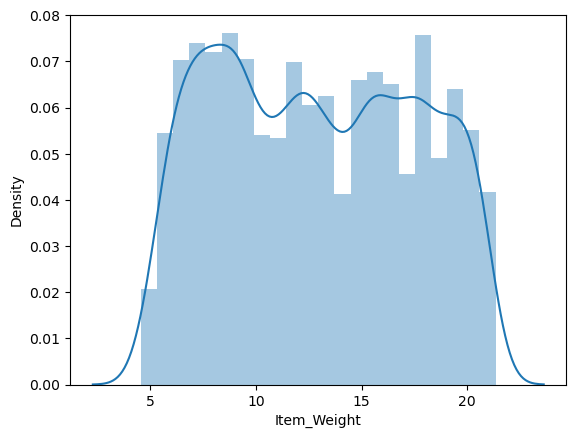

In [74]:
# Create a distribution plot for the 'Item_Weight' column
# sns.distplot() is a function from the seaborn library that creates a distribution plot
# df['Item_Weight'] specifies the column for which we want to create the distribution plot
sns.distplot(df['Item_Weight'])


<Axes: xlabel='Item_Visibility', ylabel='Density'>

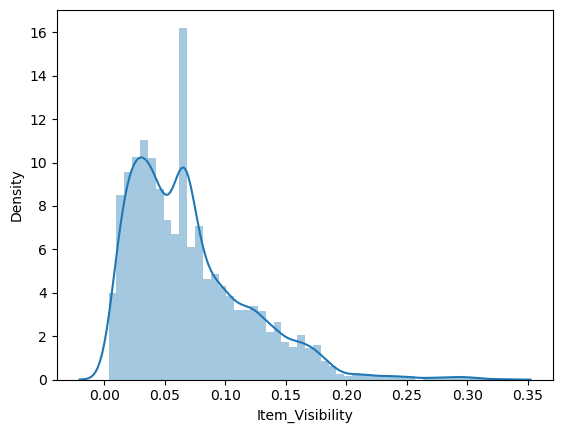

In [75]:
# Create a distribution plot for the 'Item_Visibility' column
# sns.distplot() is a function from the seaborn library that creates a distribution plot
# df['Item_Visibility'] specifies the column from the DataFrame for which we want to create the distribution plot
sns.distplot(df['Item_Visibility'])


<Axes: xlabel='Item_MRP', ylabel='Density'>

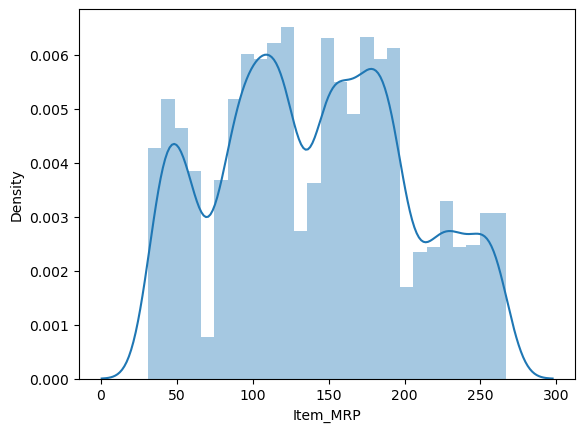

In [76]:
# Create a distribution plot for the 'Item_MRP' column
# sns.distplot() is a function from the seaborn library that creates a distribution plot
# df['Item_MRP'] specifies the column from the DataFrame for which we want to create the distribution plot
sns.distplot(df['Item_MRP'])


<Axes: xlabel='Item_Outlet_Sales', ylabel='Density'>

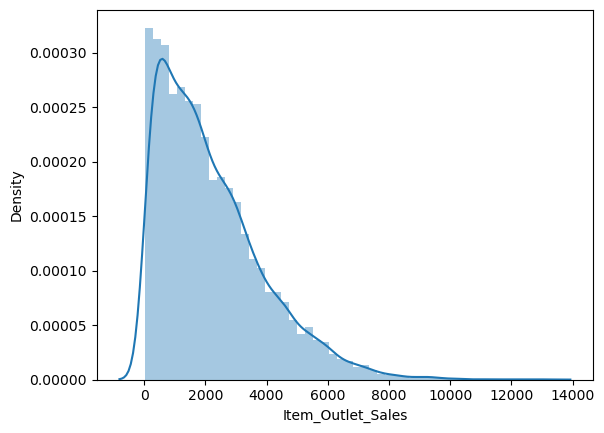

In [77]:
# Create a distribution plot for the 'Item_Outlet_Sales' column
# sns.distplot() is a function from the seaborn library that creates a distribution plot
# df['Item_Outlet_Sales'] specifies the column from the DataFrame for which we want to create the distribution plot
sns.distplot(df['Item_Outlet_Sales'])


In [78]:
# Apply a log transformation to the 'Item_Outlet_Sales' column
# np.log(1 + df['Item_Outlet_Sales']) applies the natural logarithm to each value in the 'Item_Outlet_Sales' column
# Adding 1 before applying the log transformation helps to handle cases where the sales value is 0, as log(0) is undefined
df['Item_Outlet_Sales'] = np.log(1 + df['Item_Outlet_Sales'])


<Axes: xlabel='Item_Outlet_Sales', ylabel='Density'>

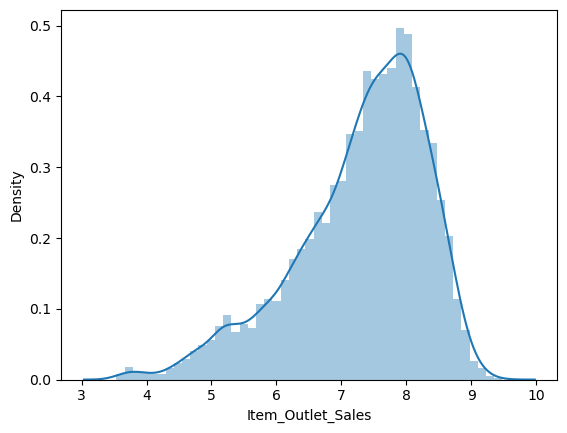

In [79]:
# Create a distribution plot for the 'Item_Outlet_Sales' column
# sns.distplot() is a function from the seaborn library that creates a distribution plot
# df['Item_Outlet_Sales'] specifies the column from the DataFrame for which we want to create the distribution plot
sns.distplot(df['Item_Outlet_Sales'])


<Axes: xlabel='count', ylabel='Item_Fat_Content'>

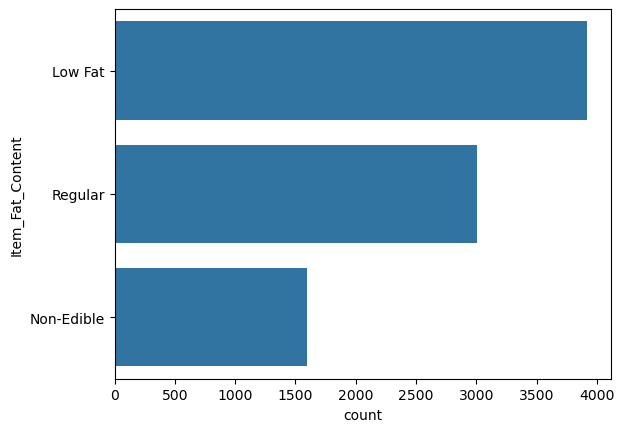

In [80]:
# Create a count plot for the 'Item_Fat_Content' column
# sns.countplot() is a function from the seaborn library that creates a count plot
# df["Item_Fat_Content"] specifies the column from the DataFrame for which we want to create the count plot
sns.countplot(df["Item_Fat_Content"])


[Text(0.0, 0, 'Dairy'),
 Text(200.0, 0, 'Soft Drinks'),
 Text(400.0, 0, 'Meat'),
 Text(600.0, 0, 'Fruits and Vegetables'),
 Text(800.0, 0, 'Household'),
 Text(1000.0, 0, 'Baking Goods'),
 Text(1200.0, 0, 'Snack Foods'),
 Text(1400.0, 0, 'Frozen Foods')]

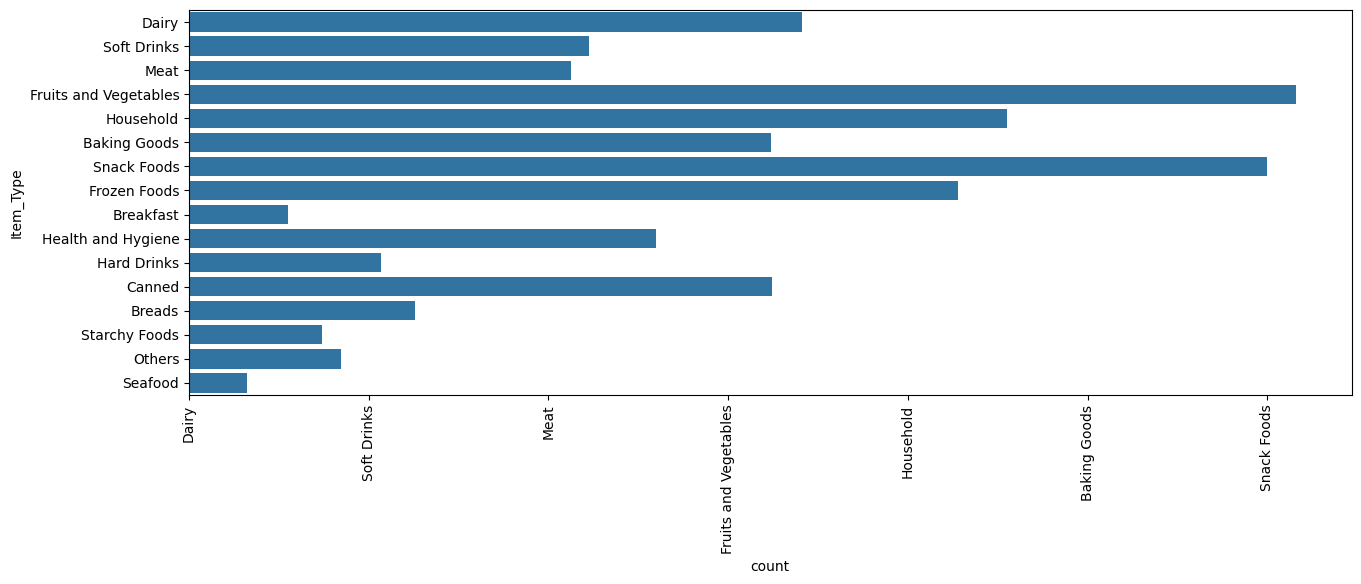

In [81]:
# Create a figure with a specific size to accommodate all x-axis labels
# plt.figure(figsize=(15,5)) sets the figure size to 15 inches by 5 inches
plt.figure(figsize=(15,5))

# Get a list of unique values in the 'Item_Type' column
# list(df['Item_Type'].unique()) creates a list of unique values in the 'Item_Type' column
l = list(df['Item_Type'].unique())

# Create a count plot for the 'Item_Type' column
# sns.countplot() is a function from the seaborn library that creates a count plot
# df['Item_Type'] specifies the column from the DataFrame for which we want to create the count plot
chart = sns.countplot(df["Item_Type"])

# Set the x-axis labels with a 90-degree rotation for better readability
# chart.set_xticklabels(labels=l, rotation=90) sets the x-axis labels to the unique values in 'Item_Type' with a 90-degree rotation
chart.set_xticklabels(labels=l, rotation=90)


<Axes: ylabel='count'>

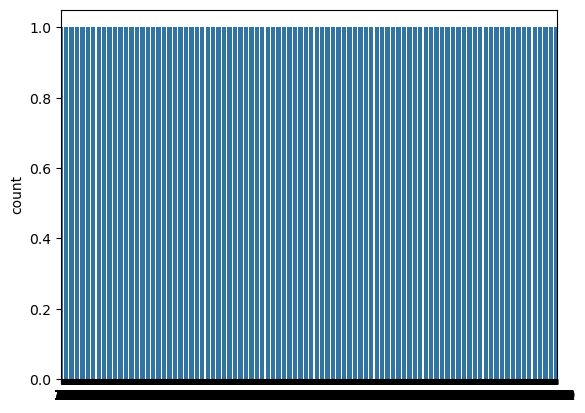

In [82]:
# Create a count plot for the 'Outlet_Establishment_Year' column
# sns.countplot() is a function from the seaborn library that creates a count plot
# df['Outlet_Establishment_Year'] specifies the column from the DataFrame for which we want to create the count plot
sns.countplot(df['Outlet_Establishment_Year'])


<Axes: xlabel='count', ylabel='Outlet_Size'>

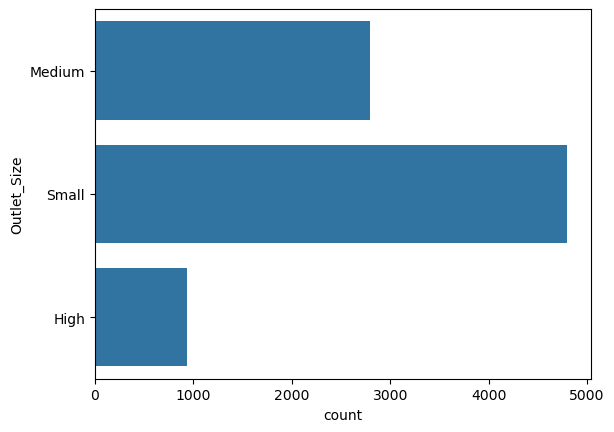

In [83]:
# Create a count plot for the 'Outlet_Size' column
# sns.countplot() is a function from the seaborn library that creates a count plot
# df['Outlet_Size'] specifies the column from the DataFrame for which we want to create the count plot
sns.countplot(df['Outlet_Size'])


<Axes: xlabel='count', ylabel='Outlet_Location_Type'>

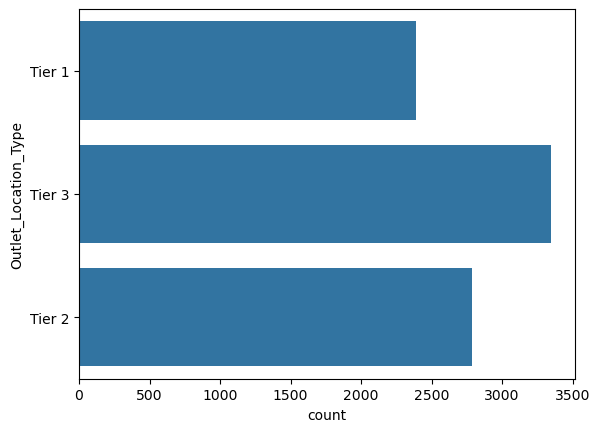

In [84]:
# Create a count plot for the 'Outlet_Location_Type' column
# sns.countplot() is a function from the seaborn library that creates a count plot
# df['Outlet_Location_Type'] specifies the column from the DataFrame for which we want to create the count plot
sns.countplot(df['Outlet_Location_Type'])


<Axes: xlabel='count', ylabel='Outlet_Type'>

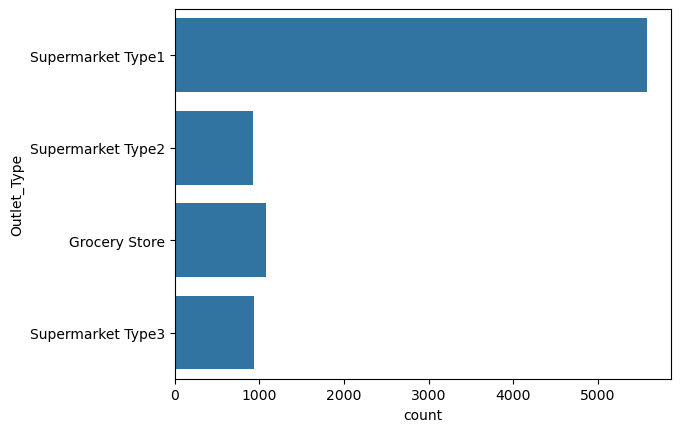

In [85]:
# Create a count plot for the 'Outlet_Type' column
# sns.countplot() is a function from the seaborn library that creates a count plot
# df['Outlet_Type'] specifies the column from the DataFrame for which we want to create the count plot
sns.countplot(df['Outlet_Type'])


## Correlation Matrix

<Axes: >

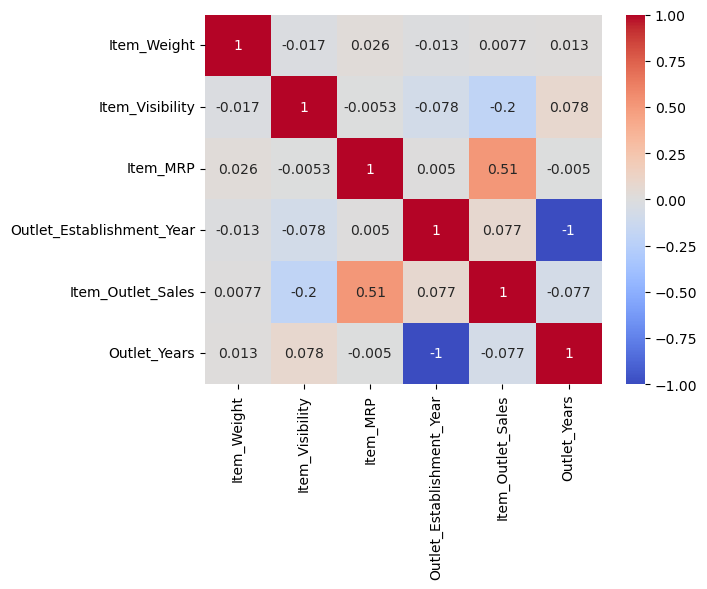

In [86]:
# Select only the numeric columns from the DataFrame
# df.select_dtypes(include='number') filters the DataFrame to include only columns with numeric data types
numeric_df = df.select_dtypes(include='number')

# Calculate the correlation matrix for the numeric columns
# numeric_df.corr() computes the pairwise correlation of columns in the DataFrame
corr = numeric_df.corr()

import seaborn as sns  # Import the seaborn library for data visualization

# Create a heatmap to visualize the correlation matrix
# sns.heatmap() is a function from the seaborn library that creates a heatmap
# corr is the correlation matrix to be visualized
# annot=True adds the correlation values as annotations on the heatmap
# cmap='coolwarm' sets the colormap to 'coolwarm' for a visually appealing color scheme
sns.heatmap(corr, annot=True, cmap='coolwarm')


In [87]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,8.225808,Food,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,6.096776,Drinks,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,7.648868,Food,14
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,6.597664,Food,15
4,NCD19,8.93,Non-Edible,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,6.903451,Non-Consumable,26


## Label Encoding

In [88]:
# Create an instance of the LabelEncoder
le = LabelEncoder()

# Apply the label encoder to the 'Outlet_Identifier' column and create a new column 'Outlet'
# le.fit_transform() fits the encoder to the data and transforms it into numerical labels
df['Outlet'] = le.fit_transform(df['Outlet_Identifier'])

# List of categorical columns that need to be encoded
cat_col = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'New_Item_Type']

# Loop through each categorical column and apply the label encoder
for col in cat_col:
    df[col] = le.fit_transform(df[col])
    # le.fit_transform() fits the encoder to the data in the current column and transforms it into numerical labels


## Onehot Encoding

In [89]:
# Convert categorical variables into dummy/indicator variables
# pd.get_dummies() function creates dummy variables for the specified columns
# 'columns' parameter specifies the columns for which to create dummy variables
df = pd.get_dummies(df, columns=['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'New_Item_Type'])

# Display the first few rows of the resulting DataFrame
# df.head() returns the first 5 rows of the DataFrame
df.head()


,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Years,Outlet,...,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,New_Item_Type_0,New_Item_Type_1,New_Item_Type_2
0,FDA15,9.30,0.016047,4,249.8092,OUT049,1999,8.225808,14,9,...,True,False,False,False,True,False,False,False,True,False
1,DRC01,5.92,0.019278,14,48.2692,OUT018,2009,6.096776,4,3,...,False,False,True,False,False,True,False,True,False,False
2,FDN15,17.50,0.016760,10,141.6180,OUT049,1999,7.648868,14,9,...,True,False,False,False,True,False,False,False,True,False
3,FDX07,19.20,0.066132,6,182.0950,OUT010,1998,6.597664,15,0,...,False,False,True,True,False,False,False,False,True,False
4,NCD19,8.93,0.066132,9,53.8614,OUT013,1987,6.903451,26,1,...,False,False,True,False,True,False,False,False,False,True


## Input Split

In [90]:
# Define the feature matrix 'X' by dropping specific columns from the DataFrame
# df.drop() function removes the specified columns
# 'columns' parameter specifies the columns to drop
# ['Outlet_Establishment_Year', 'Item_Identifier', 'Outlet_Identifier', 'Item_Outlet_Sales'] are the columns to be dropped
X = df.drop(columns=['Outlet_Establishment_Year', 'Item_Identifier', 'Outlet_Identifier', 'Item_Outlet_Sales'])

# Define the target vector 'y' as the 'Item_Outlet_Sales' column
# 'y' will be used as the target variable for machine learning models
y = df['Item_Outlet_Sales']


## Model Training

In [91]:
from sklearn.model_selection import cross_val_score  # Import the cross_val_score function for cross-validation
from sklearn.metrics import mean_squared_error  # Import the mean_squared_error function to evaluate model performance
import numpy as np  # Import numpy for numerical operations

def train(model, X, y):
    # Train the model
    # model.fit() trains the model using the feature matrix 'X' and target vector 'y'
    model.fit(X, y)
    
    # Predict the training set
    # model.predict() predicts the target values for the feature matrix 'X'
    pred = model.predict(X)
    
    # Perform cross-validation
    # cross_val_score() performs cross-validation on the model using the feature matrix 'X' and target vector 'y'
    # scoring='neg_mean_squared_error' specifies that the scoring metric is the negative mean squared error
    # cv=5 specifies 5-fold cross-validation
    cv_score = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
    
    # Convert negative mean squared error to positive and calculate the mean
    cv_score = np.abs(np.mean(cv_score))
    
    # Print the model report
    print("Model Report")
    # mean_squared_error() calculates the mean squared error between the true target values 'y' and the predicted values 'pred'
    print("MSE:", mean_squared_error(y, pred))
    # Print the cross-validation score
    print("CV Score:", cv_score)


Model Report
MSE: 0.288011745431558
CV Score: 0.2891087444195026


<Axes: title={'center': 'Model Coefficients'}>

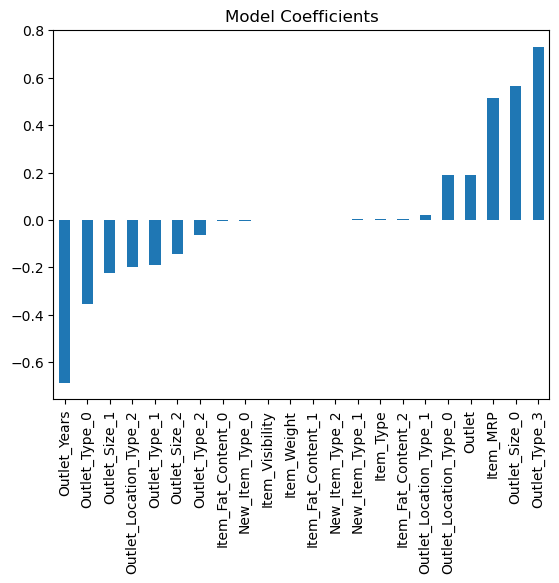

In [95]:
# from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the features
X_scaled = scaler.fit_transform(X)

# Initialize the LinearRegression model (without normalize=True)
model = LinearRegression()

# Train the model
train(model, X_scaled, y)

# Create a Series object with the model coefficients and the corresponding feature names
coef = pd.Series(model.coef_, X.columns).sort_values()

# Plot the model coefficients as a bar plot
coef.plot(kind='bar', title="Model Coefficients")


Model Report
MSE: 0.2880413978552337
CV Score: 0.2891654812791281


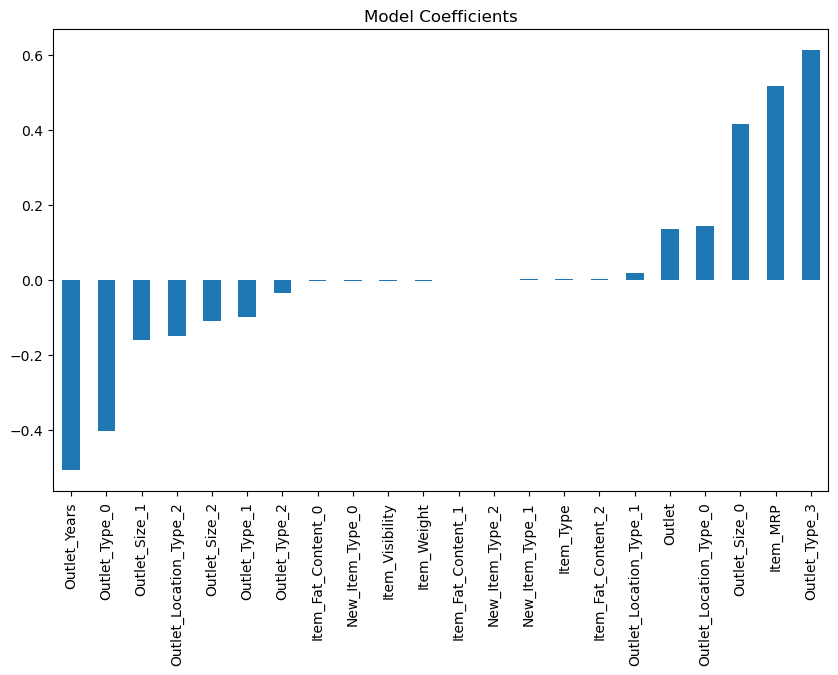

In [97]:
# Initialize the Ridge regression model without normalization
model = Ridge()

# Train the model using the train function defined earlier
# train() trains the model using the scaled feature matrix 'X_scaled' and target vector 'y'
train(model, X_scaled, y)

# Create a Series object with the model coefficients and the corresponding feature names
# model.coef_ contains the coefficients of the Ridge regression model
# X.columns contains the names of the features
# pd.Series() creates a Series object
# .sort_values() sorts the values in ascending order
coef = pd.Series(model.coef_, X.columns).sort_values()

# Plot the model coefficients as a bar plot
# plt.figure(figsize=(10, 6)) sets the size of the figure to 10 by 6 inches
# coef.plot(kind='bar') creates a bar plot of the model coefficients
# title="Model Coefficients" sets the title of the plot
plt.figure(figsize=(10, 6))
coef.plot(kind='bar', title="Model Coefficients")
# plt.show() displays the plot
plt.show()


Model Report
MSE: 0.7628688679102086
CV Score: 0.7630789166281843


<Axes: title={'center': 'Model Coefficients'}>

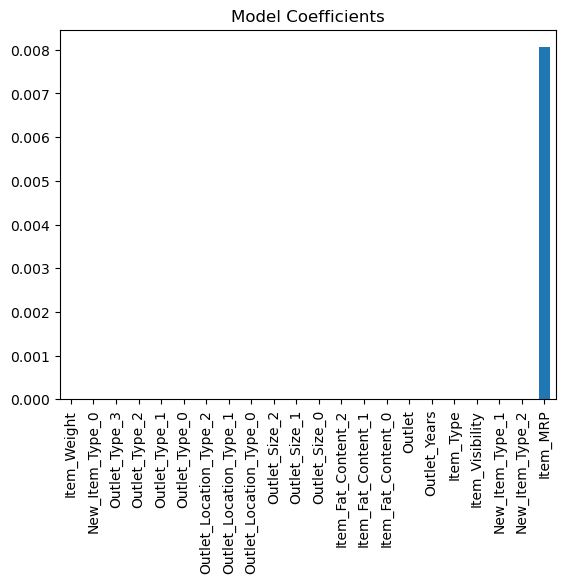

In [101]:
# Initialize the Lasso regression model
model = Lasso()

# Train the model using the train function defined earlier
# train() trains the model using the feature matrix 'X' and target vector 'y'
train(model, X, y)

# Create a Series object with the model coefficients and the corresponding feature names
# model.coef_ contains the coefficients of the Lasso regression model
# X.columns contains the names of the features
# pd.Series() creates a Series object
# .sort_values() sorts the values in ascending order
coef = pd.Series(model.coef_, X.columns).sort_values()

# Plot the model coefficients as a bar plot
# coef.plot(kind='bar') creates a bar plot of the model coefficients
# title="Model Coefficients" sets the title of the plot
coef.plot(kind='bar', title="Model Coefficients")


Model Report
MSE: 3.470876914911175e-34
CV Score: 0.5774676663533935


<Axes: title={'center': 'Feature Importance'}>

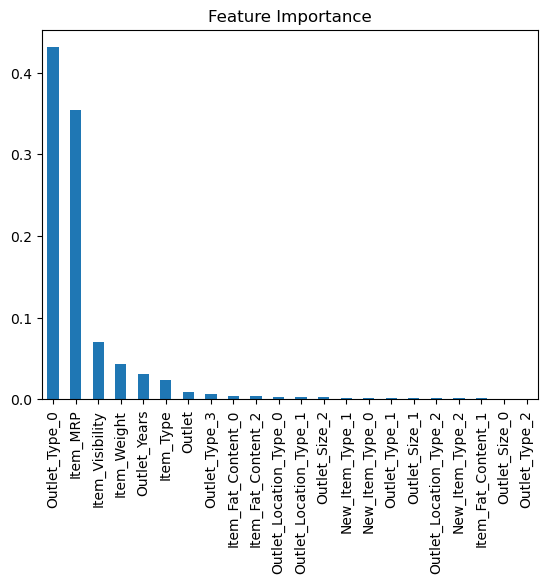

In [102]:
from sklearn.tree import DecisionTreeRegressor  # Import the DecisionTreeRegressor model from scikit-learn

# Initialize the DecisionTreeRegressor model
model = DecisionTreeRegressor()

# Train the model using the train function defined earlier
# train() trains the model using the feature matrix 'X' and target vector 'y'
train(model, X, y)

# Create a Series object with the feature importances and the corresponding feature names
# model.feature_importances_ contains the feature importances of the DecisionTreeRegressor model
# X.columns contains the names of the features
# pd.Series() creates a Series object
# .sort_values(ascending=False) sorts the values in descending order
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)

# Plot the feature importances as a bar plot
# coef.plot(kind='bar') creates a bar plot of the feature importances
# title="Feature Importance" sets the title of the plot
coef.plot(kind='bar', title="Feature Importance")


Model Report
MSE: 0.042199045070654286
CV Score: 0.30838669810133235


<Axes: title={'center': 'Feature Importance'}>

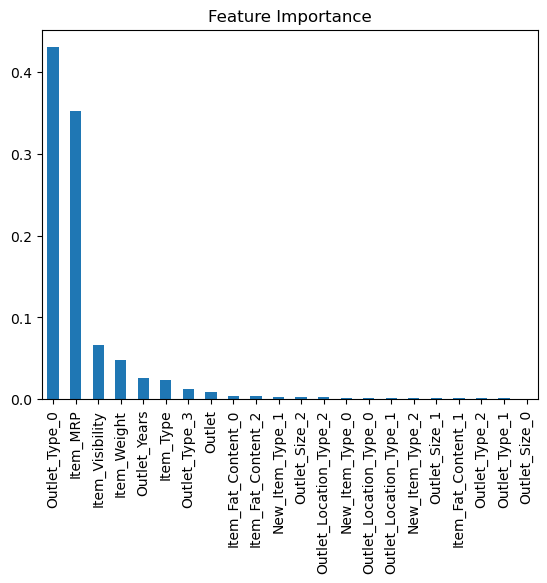

In [103]:
from sklearn.ensemble import RandomForestRegressor  # Import the RandomForestRegressor model from scikit-learn

# Initialize the RandomForestRegressor model
model = RandomForestRegressor()

# Train the model using the train function defined earlier
# train() trains the model using the feature matrix 'X' and target vector 'y'
train(model, X, y)

# Create a Series object with the feature importances and the corresponding feature names
# model.feature_importances_ contains the feature importances of the RandomForestRegressor model
# X.columns contains the names of the features
# pd.Series() creates a Series object
# .sort_values(ascending=False) sorts the values in descending order
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)

# Plot the feature importances as a bar plot
# coef.plot(kind='bar') creates a bar plot of the feature importances
# title="Feature Importance" sets the title of the plot
coef.plot(kind='bar', title="Feature Importance")


Model Report
MSE: 1.0418489584965893e-28
CV Score: 0.32936101754343233


<Axes: title={'center': 'Feature Importance'}>

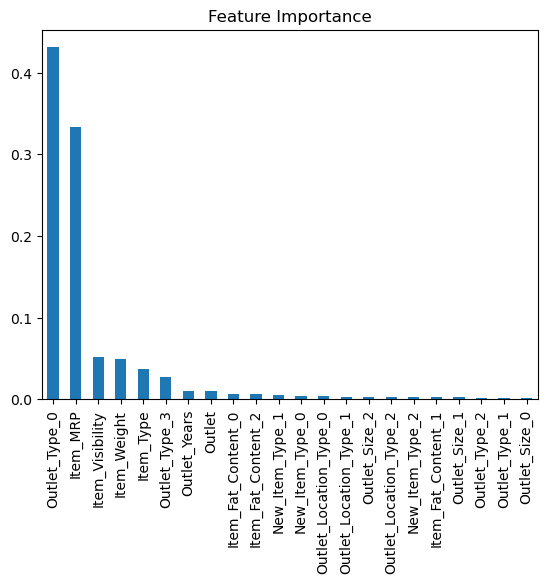

In [104]:
from sklearn.ensemble import ExtraTreesRegressor  # Import the ExtraTreesRegressor model from scikit-learn

# Initialize the ExtraTreesRegressor model
model = ExtraTreesRegressor()

# Train the model using the train function defined earlier
# train() trains the model using the feature matrix 'X' and target vector 'y'
train(model, X, y)

# Create a Series object with the feature importances and the corresponding feature names
# model.feature_importances_ contains the feature importances of the ExtraTreesRegressor model
# X.columns contains the names of the features
# pd.Series() creates a Series object
# .sort_values(ascending=False) sorts the values in descending order
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)

# Plot the feature importances as a bar plot
# coef.plot(kind='bar') creates a bar plot of the feature importances
# title="Feature Importance" sets the title of the plot
coef.plot(kind='bar', title="Feature Importance")
